In [2]:
library(tidyverse)

# STATS 306
## Homework 9: Functions and regression

## Problem 1: Let's make a deal
The *Monty Hall Problem* is a famous statistical paradox modeled after the TV game show [Let's Make a Deal](https://www.youtube.com/watch?v=hQpbsD5IueA). The problem goes as follows:
    
    You are a contestant on a game show, and are shown three doors. Behind one of the doors is a new car, 
    and behind the other two doors are Ohio State hoodies. Your goal (obviously) is to pick the door with 
    the new car. You pick a door, say number 1, and the host, who knows what's behind the doors, opens 
    another door, say No. 3, which is shown to have a hoodie. He then says to you, "Do you want to 
    pick door No. 2?" 
    
    Is it to your advantage to switch your choice?
    
The correct answer is to switch, always. This caused something of an uproar when it was first noted by a newspaper columnist in the early 1990s.

You will demonstrate that this answer is correct by writing functions that simulate playing Let's Make a Deal.

To simulate the game, will use the following bit of code:

In [122]:
play_lmad <- function(.) {
    # function to play let's make a deal. returns TRUE if the contestant wins the new car,
    # and FALSE if they get a lame Ohio State hoodie.
    
    # step 1: randomly place the car behind door 1, 2, or 3
    car_door <- place_car()
    # step 2: contestant choose a door 1, 2, or 3
    first_choice <- pick_door()
    # step 3: monty reveals one of the two other doors
    other_door <- reveal_other_door(car_door, first_choice)
    # step 4: contestant decides whether to switch
    switch <- choose_to_switch(first_choice, other_door)
    # step 5:
    if (switch) {
        # if the contestant switched, then they win if their original choice was incorrect
        return(first_choice != car_door)
    } else {
        # if they didn't switch, then they win if their original choice was correct.
        return(first_choice == car_door)
    }
}

**1(a)**
Write a function `place_car()` which randomly places the car behind door 1-3. (In other words, `place_car()` returns a uniformly distributed random integer between 1 and 3.) This models how the producers set up the show before taping.

In [116]:
### BEGIN SOLUTION
place_car <- function() sample(1:3, 1)
### END SOLUTION

**1(b)**
Write a function `pick_door()` which selects a door 1-3, according to whatever strategy you like. This models how the contestant initially picks a door.

In [117]:
### BEGIN SOLUTION
# This can be any constant function (e.g. returns 1 2 or 3 ) or a function that randomly chooses a door
pick_door <- function() 1
### END SOLUTION

**1(c)** Write a function `reveal_other_door(car_door, chosen_door)` which, given the door hiding the car, as well as the contestant's chosen door (both pieces of information which are known to Monty), names one of the other doors which does not contain the car. For example, if the car is hiding behind door one, and the contestant chooses door two, then `reveal_other_door(1, 2)` would have to return `3`.

In [118]:
### BEGIN SOLUTION
reveal_other_door <- function(car_door, chosen_door) {
  possible_choice = c(1,2,3)[!(c(1,2,3) %in% c(car_door, chosen_door))]
  if(length(possible_choice)==1) {
    return(possible_choice)
  } else {
    return(sample(possible_choice, 1))
  }
}
### END SOLUTION

**1(d)**
Write a function `choose_to_switch(first_choice, other_door)` which returns `TRUE` if the contestant decides to switch her choice after Monty has revealed the contents of one door. For example, `choose_to_switch(1, 2)` should return `TRUE` if the contestant decides to switch after choosing door one and being shown the contents of door two.

In [119]:
### BEGIN SOLUTION

# Can return always TRUE or always FALSE or randomly select TRUE or FALSE or
# choose TRUE or FALSE according to any arbitrary strategy

choose_to_switch <- function(first_choice, other_door) {
    return(TRUE)
}
### END SOLUTION

**1(e)**
Finally, use the `play_lmad()` function defined above to simulate the entire process. By experimenting various choices for `choose_to_switch()` and repeatedly running `simulate_game()`, show that it is always better to switch when offered the choice. How much better is it?

In [129]:
### BEGIN SOLUTION
simulate_game  <- function(N) {
    mean(map_lgl(1:N, play_lmad))
}

# experimenting various choices for choose_to_switch()
## case 1: always swtich
choose_to_switch <- function(first_choice, other_door) {
    return(TRUE)
}

simulate_game(10000)

## case 2: always NOT swtich
choose_to_switch <- function(first_choice, other_door) {
    return(FALSE)
}
simulate_game(10000)

## case 3: randomly swtich (this one is optional??)
choose_to_switch <- function(first_choice, other_door) {
    return(sample(c(TRUE, FALSE), 1))
}
simulate_game(10000)
### END SOLUTION

[1] 0.6644

[1] 0.3355

[1] 0.5041

## Problem 2: Playing card experiment
In this problem, you will use iteration (`for`/`while` loops) to simulate a playing card experiment. The experiment goes as follows. Suppose you are given two standard decks of playing cards (52 cards each, total of 104 cards) and you do the following:
1.  Shuffle both decks thoroughly, so that they are randomly ordered.
2.  Draw the top card off of each deck.
3.  If the two cards exactly match (same suit and rank), award yourself one point; otherwise award yourself no points.
4.  Repeat steps two and three for the remaining 51 pairs of cards.
Let $X$ be your total score at the end of the experiment.

By writing a loop which simulates this experiment, answer the following:

**2(a)** What the expected value of $X$, i.e. what is $\mathbb{E}X$?

In [6]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [90]:
### BEGIN SOLUTION
set.seed(1)
play_game <- function(.) sum(sample(52) == sample(52))  # count fixed points of a random permutation.
n <- 1000000
X <- map_int(1:n, play_game) 
mu <- mean(X)
sigma <- sd(X) / sqrt(n)
c(mu - 4 * sigma, mu + 4 * sigma)
# with 1 million trials, the mean is 1.0016 with a standard error of .001. 
# Hence, with high probability, the sample mean is in the range 
# [1.0016 - 3 * .001, 1.0016 + 3 * .001] = [0.9967649, 1.0047611], so we can conclude 
# that E(X) = 1.00.
### END SOLUTION

[1] 0.9960423 1.0040437

**2(b)** What is the variance of $X$?

In [52]:
### BEGIN SOLUTION
mean(X^2) - mu^2
### END SOLUTION

[1] 1.000343

**2(c)** What is the probability that $X$ is equal to zero? I.e., what is $\mathbb{P}(X=0)$? (*Hint*: the probability that $X=0$ roughly equals the fraction of times that this event happened in a large number of simulations.)

In [91]:
### BEGIN SOLUTION
# deck <- as.vector(outer(c(2:10, "J", "Q", "K", "A"), c("♠", "♥", "♦", "♣"), str_c, sep=""))
X0 = X == 0
mu_0 <- mean(X0)
mu_0
# sigma_0 <- sd(X0) / sqrt(n)
# c(mu_0 - 4 * sigma_0, mu_0 + 4 * sigma_0)
# 0.37
### END SOLUTION

[1] 0.367823

**2(d)** Suppose you and your friend both play this game using separate decks of cards. Let your score be $X$ and let their score be $Y$. What is the probability that your score is higher than their score (i.e. $X > Y$)?

In [86]:
### BEGIN SOLUTION
x_won = 0
for (i in seq_len(n)) {
    X = play_game()
    Y = play_game()
    x_won = x_won + 1*(X > Y)
}
x_won / n
### END SOLUTION

[1] 0.345507

In [85]:
# Solution without simulation
### BEGIN SOLUTION
prob_i = function(i) {
   prod(c(rep(1/52, i),rep(51/52, 52-i)))*choose(52,i)
}
prob_less  <- map_dbl(1:52 -1, prob_i)
sum(sapply(1:52, function(i) prob_i(i)*sum(prob_less[seq_len(i)])))
           
### END SOLUTION

[1] 0.3454481

## Problem 3: Everything is regression

In this problem, you will explore how various well-known statistical tests are special cases of linear regression.

**3(a)** Pearson's correlation coefficient, denoted $\rho$, measures the strength of a linear relationship between two variables $x$ and $y$. It's implemented using the `cor()` function in R:

In [46]:
set.seed(1)
x = rnorm(100, sd=.1)
y = 3 + 2 * x + rnorm(100, sd = 1)
cor(x, y)

[1] 0.1833815

To test whether a linear relationship exists between two variables, we can use the function `cor.test()` to test the null hypothesis $H_0: \rho=0$:

In [47]:
cor.test(x, y)


	Pearson's product-moment correlation

data:  x and y
t = 1.8467, df = 98, p-value = 0.06781
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01352373  0.36659507
sample estimates:
      cor 
0.1833815 


Consider how you might test whether the correlation between $x$ and $y$ is zero using the linear model. By running an appropriate regression, show that you get *the exact same* $p$-value as that obtained by `cor.test()`. How can we infer the correlation coefficient $\rho=0.183$ from the regression result?

In [48]:
### BEGIN SOLUTION
s <- lm(y ~ x) %>% summary %>% print
coef(s)
s$r.squared %>% sqrt
### END SOLUTION


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8768 -0.6138 -0.1395  0.5394  2.3462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.96231    0.09699  30.543   <2e-16 ***
x            1.98940    1.07727   1.847   0.0678 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9628 on 98 degrees of freedom
Multiple R-squared:  0.03363,	Adjusted R-squared:  0.02377 
F-statistic:  3.41 on 1 and 98 DF,  p-value: 0.06781



,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.962307,0.09698729,30.543252,7.065184e-52
x,1.989396,1.07727031,1.846701,6.780814e-02


[1] 0.1833815

**3(b)**
One criticism of Pearson's correlation is that it only measures the strength of a *linear* correlation between two random variables. Consider the variables $x$ and $y$ defined in the file `spearman.csv`:

In [92]:
sp <- read_csv(url("https://datasets.stats306.org/spearman.csv")) %>% print

Rows: 101 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 101 × 2
        x       y
    <dbl>   <dbl>
 1 0.689   0.594 
 2 0.468   0.119 
 3 0.808   0.580 
 4 0.0934  0.100 
 5 0.238   0.0981
 6 0.0467 -0.0138
 7 0.655   0.412 
 8 0.171   0.118 
 9 0.591   0.251 
10 0.508   0.512 
# … with 91 more rows


Are $x$ and $y$ correlated according to Pearson's test? Are they related at all? Support your answer with an appropriate visual or statistical argument.

### BEGIN SOLUTION
The Pearson test is insignificant, but if you plot the data you'll see that the result is driven by a single outlier. If you drop the outlier, you get a significant result. Note also that the remaining data seem to lie on a curve. They are related, but not necessarily linearly related.
### END SOLUTION


	Pearson's product-moment correlation

data:  sp$x and sp$y
t = 0.16219, df = 99, p-value = 0.8715
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1797128  0.2110658
sample estimates:
       cor 
0.01629891 



	Pearson's product-moment correlation

data:  sp$x[!outlier] and sp$y[!outlier]
t = 21.195, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8632539 0.9359054
sample estimates:
      cor 
0.9060443 


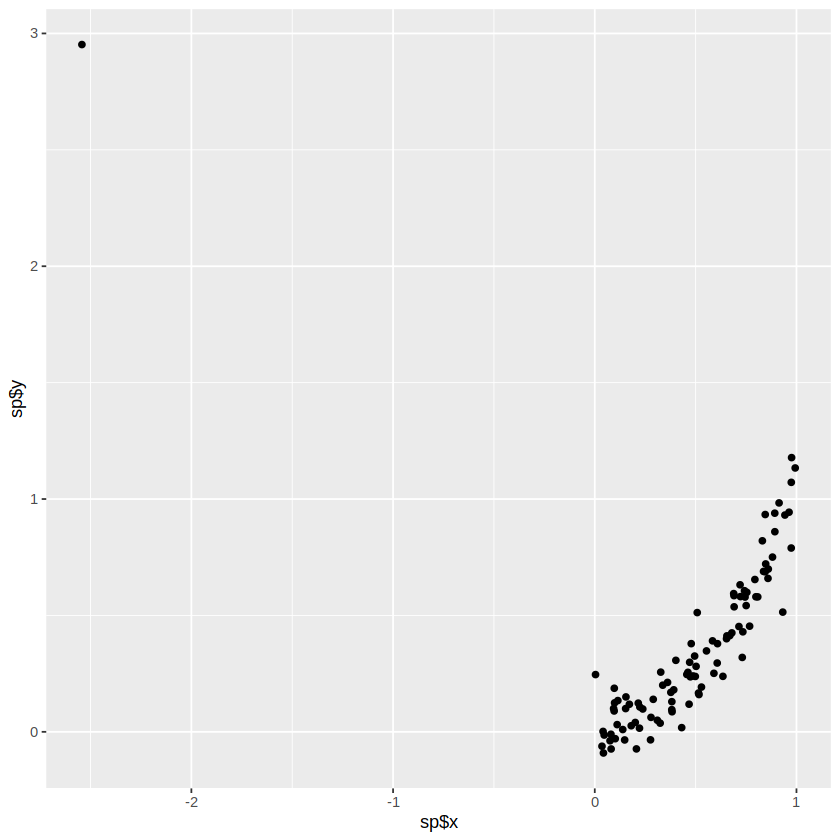

In [93]:
### BEGIN SOLUTION
cor.test(sp$x, sp$y)
qplot(sp$x, sp$y)
outlier = sp$y > 2
cor.test(sp$x[!outlier], sp$y[!outlier])
### END SOLUTION

**3(c)**
Recall that the `rank()` function maps a vector to a vector of integers denoting the numerical rank of each entry of the vector:

In [94]:
rank(c(2,6,9,10,8))

[1] 1 2 4 5 3

To address potential shortcomings in Pearson's test, *Spearman's rank correlation test* looks for correlations between the *ranks* of two vectors $x$ and $y$. This will do a better job of picking out a non-linear relationship between $x$ and $y$, so long as that relationship is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function). Verify this visualizing the relationship of `rank(x)` and `rank(y)`.

`geom_smooth()` using formula = 'y ~ x'


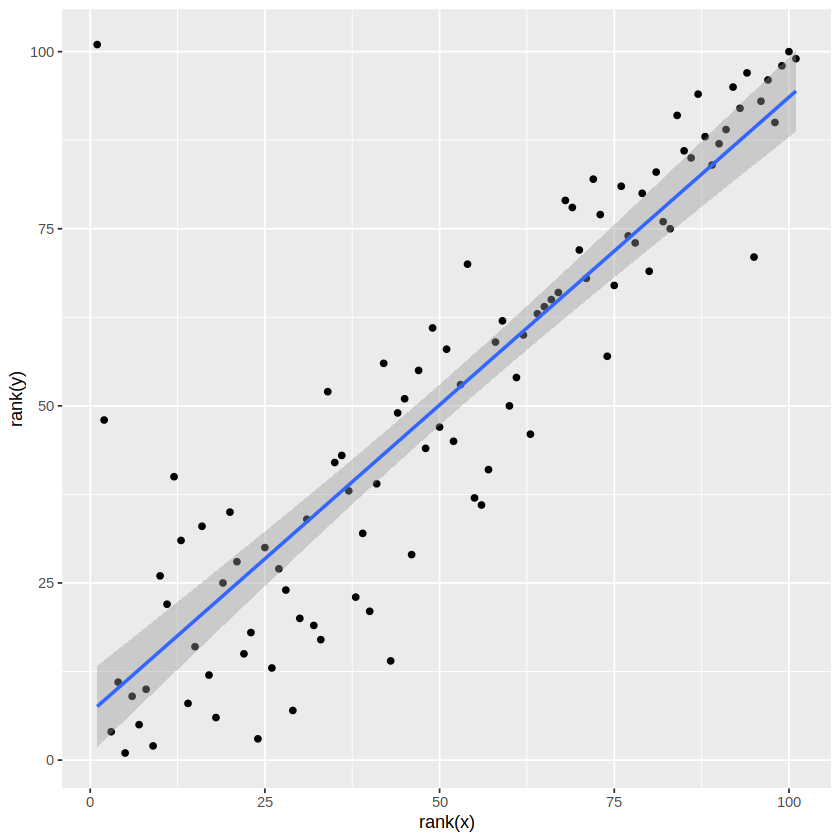

In [96]:
### BEGIN SOLUTION
ggplot(sp, aes(rank(x), rank(y))) + geom_point() + geom_smooth(method="lm")
### END SOLUTION

**3(d)** Spearman's test is implemented using the `cor.test(..., method = "spearman")` command.

Show that regressing the rank of `y` on the rank of `x` gives you you the *exact same* $p$-values and estimates for $\rho$ as Spearman't test.

In [24]:
### BEGIN SOLUTION
cor.test(sp$y, sp$x, method="spearman")
lm(rank(y) ~ rank(x), data=sp) %>% summary
### END SOLUTION


	Spearman's rank correlation rho

data:  sp$y and sp$x
S = 22534, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8687595 



Call:
lm(formula = rank(y) ~ rank(x), data = sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.050  -7.775   0.706   5.462  93.438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.69327    2.92392   2.289   0.0242 *  
rank(x)      0.86876    0.04977  17.454   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.58 on 99 degrees of freedom
Multiple R-squared:  0.7547,	Adjusted R-squared:  0.7523 
F-statistic: 304.7 on 1 and 99 DF,  p-value: < 2.2e-16


Spearman's test is an example of a [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) test: it does not make any assumptions about the distribution of the data. We will see other examples of non-parametric tests below.

**3(e)**
The one-sample $t$-test is used to test the null hypothesis that the mean of a random variable is zero. It's implemented in R using the `t.test()` command:

In [50]:
x <- rnorm(100, mean=.1)
t.test(x)


	One Sample t-test

data:  x
t = 1.2538, df = 99, p-value = 0.2129
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.07554718  0.33489425
sample estimates:
mean of x 
0.1296735 


By running an appropriate regression, show that the linear model produces *the exact same* $t$ statistic, confidence intervals, and $p$-values as the $t$-test.

In [51]:
### BEGIN SOLUTION
lm(x ~ 1) %>% {
    print(summary(.))
    print(confint(.))
}
### END SOLUTION


Call:
lm(formula = x ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91859 -0.48482 -0.03128  0.66882  2.61949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.1297     0.1034   1.254    0.213

Residual standard error: 1.034 on 99 degrees of freedom

                  2.5 %    97.5 %
(Intercept) -0.07554718 0.3348942
